# Part 1: Finding the Golden Statue of Bastet

## Step 1: Define the Data Structure

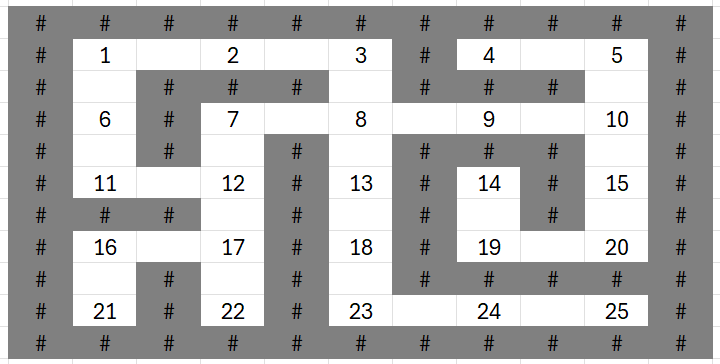

Figure 1: Modified floor plan

In [1]:
# Representing the maze as an array of strings
def createMaze():
  maze = [
    ["#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#"], # top border
    ["#", "1", " ", "2", " ", "3", "#", "4", " ", "5", "#"], # row 1
    ["#", " ", "#", "#", "#", " ", "#", "#", "#", " ", "#"], # divider
    ["#", "6", "#", "7", " ", "8", " ", "9", " ", "10", "#"], # row 2
    ["#", " ", "#", " ", "#", " ", "#", "#", "#", " ", "#"], # divider
    ["#", "11", " ", "12", "#", "13", "#", "14", "#", "15", "#"], # row 3
    ["#", "#", "#", " ", "#", " ", "#", " ", "#", " ", "#"], # divider
    ["#", "16", " ", "17", "#", "18", "#", "19", " ", "20", "#"], # row 4
    ["#", " ", "#", " ", "#", " ", "#", "#", "#", "#", "#"], # divider
    ["#", "21", "#", "22", "#", "23", " ", "24", " ", "25", "#"], # row 5
    ["#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#"] # bottom border
  ]
  return maze

def printMaze(maze):
  for row in maze:
    for col in row:
      print(f"{col:2}", end=" ")
    print()

printMaze(createMaze())

#  #  #  #  #  #  #  #  #  #  #  
#  1     2     3  #  4     5  #  
#     #  #  #     #  #  #     #  
#  6  #  7     8     9     10 #  
#     #     #     #  #  #     #  
#  11    12 #  13 #  14 #  15 #  
#  #  #     #     #     #     #  
#  16    17 #  18 #  19    20 #  
#     #     #     #  #  #  #  #  
#  21 #  22 #  23    24    25 #  
#  #  #  #  #  #  #  #  #  #  #  


In [2]:
def extractMazeInfo(maze):
  V = 0
  G = {}

  def getNeighbors(row, col):
    neighbors = []
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0)] # left, right, up, down
    for dr, dc in directions:
      r, c = row + dr, col + dc
      if 0 <= r < len(maze) and 0 <= c < len(maze[0]) and maze[r][c] != "#":
        if maze[r][c] != " ":
          print(f"maze[{r}][{c}] = {maze[r][c]}")
          neighbors.append("({maze[r][c]}, 1)") # vertex, weight
    return neighbors
  
  for r in range(len(maze)):
    for c in range(len(maze[0])):
      if maze[r][c] != "#" and maze[r][c] != " ":
        V += 1
        node = maze[r][c]
        G[node] = getNeighbors(r, c)
  
  return V, G

# V, G = extractMazeInfo(createMaze())

V = 25
G = {
  1: [(2, 1), (6, 1)],
  2: [(1, 1), (3, 1)],
  3: [(2, 1), (8, 1)],
  4: [(5, 1)],
  5: [(4, 1), (10, 1)],
  6: [(1, 1), (11, 1)],
  7: [(8, 1), (12, 1)],
  8: [(3, 1), (7, 1), (9, 1), (13, 1)],
  9: [(8, 1), (10, 1)],
  10: [(5, 1), (9, 1), (15, 1)],
  11: [(6, 1), (12, 1)],
  12: [(7, 1), (11, 1), (17, 1)],
  13: [(8, 1), (18, 1)],
  14: [(19, 1)],
  15: [(10, 1), (20, 1)],
  16: [(17, 1), (21, 1)],
  17: [(12, 1), (16, 1), (22, 1)],
  18: [(13, 1), (23, 1)],
  19: [(14, 1), (20, 1)],
  20: [(15, 1), (19, 1)],
  21: [(16, 1)],
  22: [(17, 1)],
  23: [(18, 1), (24, 1)],
  24: [(23, 1), (25, 1)],
  25: [(24, 1)],
}
start = 1

print("Maze represented in graph:")
print("Number of vertices:", V)
print("Graph represented using adjancency list with their respective weights:\n", G)
print("Start point:", start)

Maze represented in graph:
Number of vertices: 25
Graph represented using adjancency list with their respective weights:
 {1: [(2, 1), (6, 1)], 2: [(1, 1), (3, 1)], 3: [(2, 1), (8, 1)], 4: [(5, 1)], 5: [(4, 1), (10, 1)], 6: [(1, 1), (11, 1)], 7: [(8, 1), (12, 1)], 8: [(3, 1), (7, 1), (9, 1), (13, 1)], 9: [(8, 1), (10, 1)], 10: [(5, 1), (9, 1), (15, 1)], 11: [(6, 1), (12, 1)], 12: [(7, 1), (11, 1), (17, 1)], 13: [(8, 1), (18, 1)], 14: [(19, 1)], 15: [(10, 1), (20, 1)], 16: [(17, 1), (21, 1)], 17: [(12, 1), (16, 1), (22, 1)], 18: [(13, 1), (23, 1)], 19: [(14, 1), (20, 1)], 20: [(15, 1), (19, 1)], 21: [(16, 1)], 22: [(17, 1)], 23: [(18, 1), (24, 1)], 24: [(23, 1), (25, 1)], 25: [(24, 1)]}
Start point: 1


## Step 2: Algorithm Design (Pseudocode)

### Source:
[Finding the Shortest Path in a Graph Visiting All Nodes](https://www.baeldung.com/cs/shortest-path-visiting-all-nodes)

### Data Structures:
- Matrix `cost` with size `V x 2^V` where each row corresponds to a node, and each column corresponds to a bitmask representing visited nodes.
- List `priority_queue` used to prioritize nodes based on their current cost.

### Pseudocode:

```
function DijkstraApproach(V, G):
    Initialize cost matrix 'cost' with all entries as infinity
    Initialize priority queue 'pq' as empty

    for node from 0 to V-1:
        Add (node, 2^node) to 'pq' with priority 0
        Set cost[node][2^node] = 0

    while 'pq' is not empty:
        current, mask <- Dequeue node from 'pq'
        
        for child, weight in G[current]:
            new_mask <- mask or (1 << child)
            if cost[child][new_mask] > cost[current][mask] + weight:
                cost[child][new_mask] <- cost[current][mask] + weight
                Enqueue (child, new_mask) to 'pq' with priority cost[child][new_mask]

    Initialize answer as infinity
    final_mask <- 2^V - 1  // Bitmask representing all nodes visited
    for node from 0 to V-1:
        answer <- min(answer, cost[node][final_mask])

    return answer
```

### Explanation:
- The algorithm uses Dijkstra's approach to find the shortest path visiting all nodes.
- It maintains a `cost` matrix to store the shortest distances and a priority queue `pq` to explore nodes based on their costs.
- The bitmask `mask` in the priority queue represents the visited nodes.
- The algorithm iteratively updates the costs and masks for each node and bitmask combination.
- After exploration, it finds the minimum cost among all nodes for the final bitmask representing all nodes visited.

First, we define an array `cost` to hold the shortest paths to various nodes while visiting subsets of nodes. Additionally, we create a priority queue `priority_queue` to store nodes along with their corresponding bitmasks, representing visited nodes for each node's path. This queue ensures that states are processed in ascending order based on their costs.

To initialize the shortest paths from each node, we add each node to the priority queue with its corresponding bitmask (turning on its bit). Then, we apply Dijkstra's algorithm.

During each iteration, we examine the neighboring nodes of the current node. For each neighbor, we compare its current cost of reaching a specific subset of nodes with the cost of reaching it through the current node plus the weight of the edge connecting them. If the former is greater, we update the cost for that neighbor. Furthermore, we enqueue the neighbor along with the updated bitmask obtained by bitwise-OR with 2^child into the priority queue, indicating that we've visited the child node.

Ultimately, our answer represents the minimum cost among all nodes for visiting all nodes along their respective shortest paths.

## Step 3: Idea Implementation

In [3]:
import heapq

def FindShortestPathCost(V, G, start):
    # Initialize cost matrix with infinity values
    cost = [[float('inf')] * (1 << V) for _ in range(V + 1)]

    # Initialize priority queue and cost for start node
    priority_queue = []
    start_node = start
    heapq.heappush(priority_queue, (0, start_node, 1 << (start_node - 1)))
    cost[start_node][1 << (start_node - 1)] = 0

    while priority_queue:
        cur_cost, current, mask = heapq.heappop(priority_queue)

        # Skip if current cost is higher than known cost
        if cur_cost > cost[current][mask]:
            continue

        for child, weight in G[current]:
            new_mask = mask | (1 << (child - 1))
            if cost[child][new_mask] > cost[current][mask] + weight:
                cost[child][new_mask] = cost[current][mask] + weight
                heapq.heappush(priority_queue, (cost[child][new_mask], child, new_mask))

    # Find minimum cost to visit all nodes
    answer = float('inf')
    final_mask = (1 << V) - 1  # Bitmask to represent all nodes visited
    for node in range(1, V + 1):
        answer = min(answer, cost[node][final_mask])

    return answer

## Step 4: Testing the Algorithm

In [4]:
shortest_path = FindShortestPathCost(V, G, start)
print("Shortest path cost:", shortest_path)

Shortest path cost: 37


## Step 5: Algorithm Illustration & Explanation

Let's illustrate the algorithm using a simpler example with 4 vertices, thus the `cost` matrix will have dimensions of `4 x 16` (`V x 2^V`).

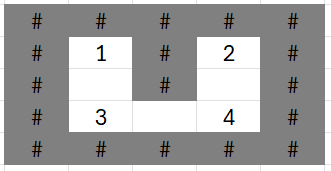

In [5]:
V = 4
G = {
  1: [(3, 1)],
  2: [(4, 1)],
  3: [(1, 1), (4, 1)],
  4: [(2, 1), (3, 1)],
}

import heapq

def DijkstraApproach(V, G, start=1):
    # Initialize cost matrix with infinity values
    cost = [[float('inf')] * (1 << V) for _ in range(V + 1)]

    # Initialize priority queue and cost for start node
    priority_queue = []
    start_node = start
    heapq.heappush(priority_queue, (0, start_node, 1 << (start_node - 1)))
    cost[start_node][1 << (start_node - 1)] = 0

    while priority_queue:
        cur_cost, current, mask = heapq.heappop(priority_queue)

        # Skip if current cost is higher than known cost
        if cur_cost > cost[current][mask]:
            continue

        for child, weight in G[current]:
            new_mask = mask | (1 << (child - 1))
            if cost[child][new_mask] > cost[current][mask] + weight:
                cost[child][new_mask] = cost[current][mask] + weight
                heapq.heappush(priority_queue, (cost[child][new_mask], child, new_mask))

    # Find minimum cost to visit all nodes
    answer = float('inf')
    final_mask = (1 << V) - 1  # Bitmask to represent all nodes visited
    for node in range(1, V + 1):
        answer = min(answer, cost[node][final_mask])
    
    return answer, cost

def printCostMatrix(cost):
    print("Cost matrix:")
    print("Bitmask\t| 0000 | 0001 | 0010 | 0011 | 0100 | 0101 | 0110 | 0111 | 1000 | 1001 | 1010 | 1011 | 1100 | 1101 | 1110 | 1111 | ")
    for idx, row in enumerate(cost):
        print(f"Node {idx}\t|", end=" ")
        for col in row:
            print(f"{col:4}", end=" | ")
        print()

shortest_path, cost = DijkstraApproach(V, G, 1)
printCostMatrix(cost)
print("Shortest path cost to visit all nodes (1111):", shortest_path)

Cost matrix:
Bitmask	| 0000 | 0001 | 0010 | 0011 | 0100 | 0101 | 0110 | 0111 | 1000 | 1001 | 1010 | 1011 | 1100 | 1101 | 1110 | 1111 | 
Node 0	|  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf | 
Node 1	|  inf |    0 |  inf |  inf |  inf |    2 |  inf |  inf |  inf |  inf |  inf |  inf |  inf |    4 |  inf |    6 | 
Node 2	|  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |    3 | 
Node 3	|  inf |  inf |  inf |  inf |  inf |    1 |  inf |  inf |  inf |  inf |  inf |  inf |  inf |    3 |  inf |    5 | 
Node 4	|  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |  inf |    2 |  inf |    4 | 
Shortest path cost to visit all nodes (1111): 3


The `cost` matrix is a crucial part of this algorithm, representing the shortest distances from each node to all possible combinations of visited nodes. For example, `0110` represents node 2 and node 3 are visited while node 1 and node 4 are not.

- Rows: Corresponds to a node in the graph (representing the maze).
- Column: Represents a bitmask that indicates which nodes have been visited.
- Values: Represents the shortest distance from the current node to the nodes specified in the bitmask.

## Step 6: Algorithm Analysis

The time complexity of the algorithm is **`O(V x 2^V x log(V x 2^V))`**, where `V` is the number of nodes and `2^V` is the number of all possible subset of nodes, and `log(V x 2^V)` for adding each state to the priority queue.

## Step 7: Discussion (Advantages & Limitations, Possible Modifications, Algorithm Alternatives)

## Others

### Answer by inspection:
1, 6, 11, 12, 17, 22, 17, 16, 21, 16, 17, 12, 7, 8, 3, 2, 3, 8, 13, 18, 23, 24, 25, 24, 23, 18, 13, 8, 9, 10, 5, 4, 5, 10, 15, 20, 19, 14

### Shortest Distance: 37

### Source:
[Python Path Finding Tutorial - Breadth First Search Algorithm](https://youtu.be/hettiSrJjM4)

In [6]:
import queue

def createMaze():
  maze = []
  maze.append(["#", "#", "#", "#", "#", "#", "#", "#", "O", "#", "#"])
  maze.append(["#", " ", " ", " ", " ", " ", "#", " ", " ", " ", "#"])
  maze.append(["#", " ", "#", "#", "#", " ", "#", "#", "#", " ", "#"])
  maze.append(["#", " ", "#", " ", " ", " ", " ", " ", " ", " ", "#"])
  maze.append(["#", " ", "#", " ", "#", " ", "#", "#", "#", " ", "#"])
  maze.append(["#", " ", " ", " ", "#", " ", "#", " ", "#", " ", "#"])
  maze.append(["#", "#", "#", "#", "#", " ", "#", " ", "#", " ", "#"])
  maze.append(["#", " ", " ", " ", " ", " ", "#", " ", " ", " ", "#"])
  maze.append(["#", " ", "#", " ", "#", " ", "#", "#", "#", "#", "#"])
  maze.append(["#", " ", "#", " ", "#", " ", " ", " ", " ", " ", "#"])
  maze.append(["#", "X", "#", "#", "#", "#", "#", "#", "#", "#", "#"])
  return maze

def printMaze(maze, path=""):
  for x, pos in enumerate(maze[0]):
    if pos == "O":
      start = x
  
  i = start
  j = 0
  pos = set()
  for move in path:
    if move == "L":
      i -= 1
    elif move == "R":
      i += 1
    elif move == "U":
      j -= 1
    elif move == "D":
      j += 1
    pos.add((j, i))

  for j, row in enumerate(maze):
    for i, col in enumerate(row):
      if (j, i) in pos:
        print("+ ", end="")
      else:
        print(col + " ", end="")
    print()

def valid(maze, moves):
  for x, pos in enumerate(maze[0]):
    if pos == "O":
      start = x
  
  i = start
  j = 0
  for move in moves:
    if move == "L":
      i -= 1
    elif move == "R":
      i += 1
    elif move == "U":
      j -= 1
    elif move == "D":
      j += 1

    if not(0 <= i < len(maze[0]) and 0 <= j < len(maze)):
      return False
    elif (maze[j][i] == "#"):
      return False
    
  return True

def findEnd(maze, moves):
  if maze is None:
    print("Maze is None")
    return False
  
  for x, pos in enumerate(maze[0]):
    if pos == "O":
      start = x

  i = start
  j = 0
  for move in moves:
    if move == "L":
      i -= 1
    elif move == "R":
      i += 1
    elif move == "U":
      j -= 1
    elif move == "D":
      j += 1

  if maze[j][i] == "X":
    print("Found: " + moves)
    printMaze(maze, moves)
    return True
  
  return False


nums = queue.Queue()
nums.put("")
add = ""
maze = createMaze()

while not findEnd(maze, add): 
  add = nums.get()
  # print(add)
  for j in ["L", "R", "U", "D"]:
    put = add + j
    if valid(maze, put):
      nums.put(put)

Found: DRDDLLLLDDDDLLLLDDD
# # # # # # # # O # # 
#           #   + + # 
#   # # #   # # # + # 
#   #     + + + + + # 
#   #   # + # # #   # 
#       # + #   #   # 
# # # # # + #   #   # 
# + + + + + #       # 
# + #   #   # # # # # 
# + #   #           # 
# + # # # # # # # # # 


In [7]:
import heapq

def DijkstraApproach(V, G):
    # Initialize cost matrix with infinity values
    cost = [[float('inf')] * (1 << V) for _ in range(V + 1)]

    # Initialize priority queue and cost for start node
    priority_queue = []
    start_node = 1
    heapq.heappush(priority_queue, (0, start_node, 1 << (start_node - 1)))
    cost[start_node][1 << (start_node - 1)] = 0

    while priority_queue:
        cur_cost, current, mask = heapq.heappop(priority_queue)

        # Skip if current cost is higher than known cost
        if cur_cost > cost[current][mask]:
            continue

        for child, weight in G[current]:
            new_mask = mask | (1 << (child - 1))
            if cost[child][new_mask] > cost[current][mask] + weight:
                cost[child][new_mask] = cost[current][mask] + weight
                heapq.heappush(priority_queue, (cost[child][new_mask], child, new_mask))

    # Find minimum cost to visit all nodes
    answer = float('inf')
    final_mask = (1 << V) - 1  # Bitmask to represent all nodes visited
    for node in range(1, V + 1):
        answer = min(answer, cost[node][final_mask])

    return answer

V = 25
G = {
  1: [(2, 1), (6, 1)],
  2: [(1, 1), (3, 1)],
  3: [(2, 1), (8, 1)],
  4: [(5, 1)],
  5: [(4, 1), (10, 1)],
  6: [(1, 1), (11, 1)],
  7: [(8, 1), (12, 1)],
  8: [(3, 1), (7, 1), (9, 1), (13, 1)],
  9: [(8, 1), (10, 1)],
  10: [(5, 1), (9, 1), (15, 1)],
  11: [(6, 1), (12, 1)],
  12: [(7, 1), (11, 1), (17, 1)],
  13: [(8, 1), (18, 1)],
  14: [(19, 1)],
  15: [(10, 1), (20, 1)],
  16: [(17, 1), (21, 1)],
  17: [(12, 1), (16, 1), (22, 1)],
  18: [(13, 1), (23, 1)],
  19: [(14, 1), (20, 1)],
  20: [(15, 1), (19, 1)],
  21: [(16, 1)],
  22: [(17, 1)],
  23: [(18, 1), (24, 1)],
  24: [(23, 1), (25, 1)],
  25: [(24, 1)],
}

shortest_path = DijkstraApproach(V, G)
print("Shortest path cost:", shortest_path)

Shortest path cost: 37
